# PCA of a breast cancer data set

In the following we will look at a breast cancer data set comprising of real-valued multivariate data. The data decomposes into two classes representing if a patient has breast cancer or not.

The class representing the malignant cases has 212 samples. The benign cases comprise of 357 samples.

The data itself is of dimension 30, i.e. each case (malignant or benign) has 30 features indicating the radius, texture, area,... of the sample.

The dataset used hereafter can be obtained from the following link:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

The discussion itself is inspired by the tutorial:
https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

For resources on the topic of principal component analysis itself, we refer to the following links:

1) https://www.nature.com/articles/nmeth.4346

2) https://www.youtube.com/watch?v=kuzJJgPBrqc

3) https://en.wikipedia.org/wiki/Principal_component_analysis


## 1) Data preprocessing

### Loading necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading the dataset

We load the dataset (without the labels) and print the shape which confirms that it consists of 569 samples with 30 features.

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
breast = load_breast_cancer()

In [4]:
breast_data = breast.data

In [5]:
breast_data.shape

(569, 30)

Each sample has a label attached. We load the labels, compare the shapes and reshape the labels array for further processing:

In [6]:
breast_labels = breast.target

In [7]:
breast_labels.shape

(569,)

In [8]:
labels = np.reshape(breast_labels,(569,1))

After reshaping both arrays (data and labels) can be concatenated: 

In [9]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [10]:
final_breast_data.shape

(569, 31)

From the concatenated arrays we create a dataframe to have the information ready in tabular form:

In [11]:
breast_dataset = pd.DataFrame(final_breast_data)

In the next step we print the 30 features of the dataset and will then add the label field:

In [12]:
features = breast.feature_names

In [13]:
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [14]:
features_labels = np.append(features,'label')

 In the next step we allocate the column names to the dataframe and print its head afterwards:

In [15]:
breast_dataset.columns = features_labels

In [16]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


The original labels are changed to benign and malignant:

In [17]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

We print the tail of the dataset to demonstrate that the labels have just been changed:

In [18]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


## 2) Data visualization using PCA

We start off by adjusting the data across all dimensions to fit onto the same scale. The normalization is applied to the features data and assumes that it is normally distributed. Its result is a distribution  with zero mean and unit standard deviation.

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [21]:
x.shape

(569, 30)

In [22]:
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

 In the following the normalized features are brought into tabular form:

In [23]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


The most important step consists of the PCA itself. In the following we will project the 30 dimensional data to three principal components.

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca_breast = PCA(n_components=3)
principalComponents_breast = pca_breast.fit_transform(x)

In the next step we build a dataframe which only has the just produced principal component values for all of the 569 samples:

In [26]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

We print head and tail of the new dataframe:

In [27]:
principal_breast_Df.head()

,principal component 1,principal component 2,principal component 3
0,9.192837,1.948583,-1.123162
1,2.387802,-3.768172,-0.529290
2,5.733896,-1.075174,-0.551748
3,7.122953,10.275589,-3.232787
4,3.935302,-1.948072,1.389769


In [28]:
principal_breast_Df.tail()

,principal component 1,principal component 2,principal component 3
564,6.439315,-3.576817,2.459488
565,3.793382,-3.584048,2.088476
566,1.256179,-1.902297,0.562729
567,10.374794,1.672010,-1.877031
568,-5.475243,-0.670637,1.490448


With the principal compoments we can give the so-called explained variance ratio. It is a measure of variance (thus information) telling us how much variance a principal component holds.

In [34]:
print('Explained variance per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variance per principal component: [0.44272026 0.18971182 0.09393163]


From these numbers we notice that while projecting from 30 dimensions to 3d data about 28% of the information is lost.

In the following we produce a visualization of the 569 samples along the axes provided by the 1st and 2nd principal components. From this we can retrieve the sample distribution along the two label classes.

<Figure size 432x288 with 0 Axes>

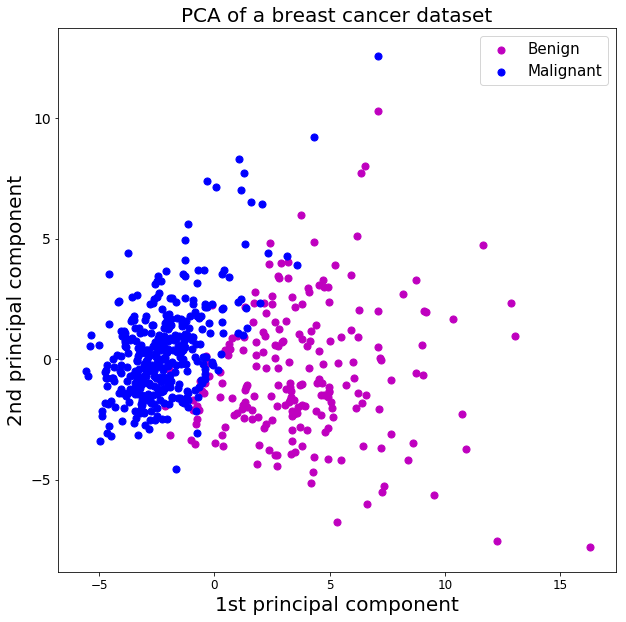

In [54]:
#setting up the plot
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('1st principal component',fontsize=20)
plt.ylabel('2nd principal component',fontsize=20)
plt.title("PCA of a breast cancer dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['m', 'b']

#insertion of the data into the plot
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

#setting up the legend
plt.legend(targets,prop={'size': 15})

plt.show()

From this 2d plot we gain two insights. First, we see that the two label classes are (mostly) linearily separable. Second, malignant class is less spread out as compared to the other one. We also realize that when using the 1st and 3rd or 2nd and 3rd pcs for plotting that the separation is less pronounced. Hence, using the the 1st and 2nd pcs is most profitable for further information extraction.

This is further supported by plotting the samples over the three first principal components:

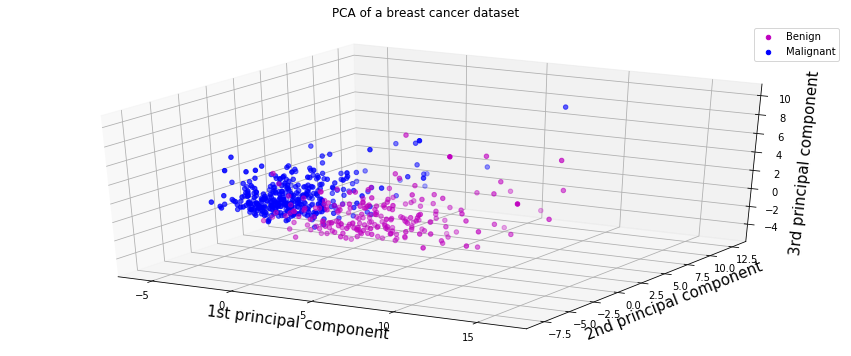

In [57]:
targets = ['Benign', 'Malignant']
colors = ['m', 'b']

fig = plt.figure(figsize = (15,6))

ax = fig.add_subplot(111, projection = '3d')
ax.title.set_text("PCA of a breast cancer dataset")
ax.set_xlabel('1st principal component',fontsize=15)
ax.set_ylabel('2nd principal component',fontsize=15)
ax.set_zlabel('3rd principal component',fontsize=15)

for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    ax.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'],principal_breast_Df.loc[indicesToKeep, 'principal component 3'],
          c = color, s = 20)

plt.legend(targets,prop={'size': 10})
plt.show()

## 3) Further processing

We note that further processing of the data using logistic regression could be possible if additional training data was available and a test set was provided.